# 2017 Kaggle Machine Learning & Data Science Survey

https://www.kaggle.com/code/rounakbanik/data-science-faq/notebook

All: Every respondent was shown this question

Non-worker: Respondents who indicated that they were "Not employed, and not looking for work" or "I prefer not to say"

Non-switcher: Respondents that indicated that they were not actively looking to switch careers to data science.

Worker: Respondents who indicted that they were "Employed full-time", "Employed part-time", "Independent contractor, freelancer, or self-employed", or "retired"

CodingWorker: Respondents who indicated that they were "Employed full-time", "Employed part-time", or an "Independent contractor, freelancer, or self-employed" AND that they write code to analyze data in their current job

CodingWorker-NC: Respondents who indicated that they were "Employed full-time" or "Employed part-time" AND that they write code to analyze data in their current job. 

Learners: Respondents who indicated that they were either students, formally or informally learning data science skills, planning to transition into data science, or not employed but looking for work

## 데이터 파일

5개의 데이터 파일을 제공

* schema.csv : 설문 스키마가 있는 CSV파일. multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함됨
* multipleChoiceResponse.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017년 9월 14일에 액세스한 통화 변환율(USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마.

## Loading Data and Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('2017_Kaggle_ML_DS_Survey/schema.csv')
question.shape

# 290개의 문항, 3개의 Column

(290, 3)

In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [11]:
# 선다형 객관식 문제에 대한 응답 데이터
mcq = pd.read_csv('2017_Kaggle_ML_DS_Survey/multipleChoiceResponses.csv',
                  encoding='iso-8859-1', low_memory=False)
mcq.shape

# 16,716명이 응답. 선다형 객관식 문제는 228개

(16716, 228)

In [12]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [13]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

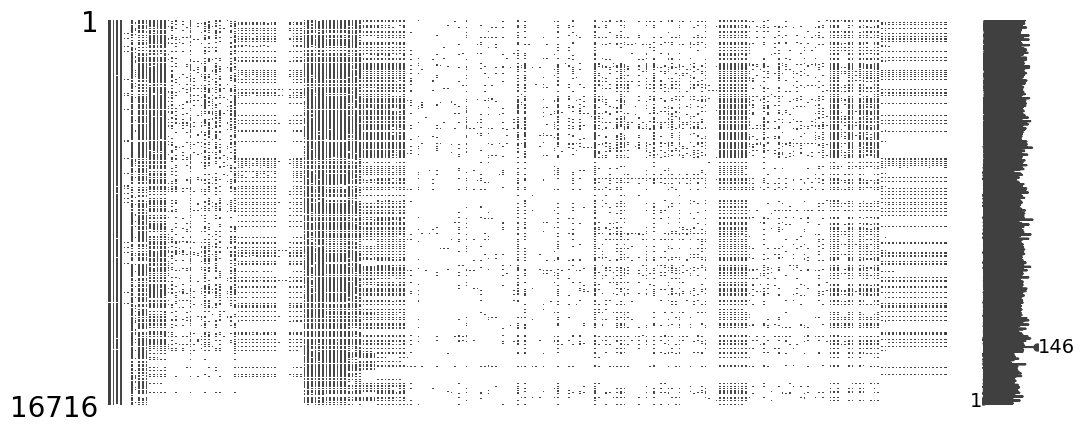

In [16]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 Column이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.

import missingno as msno

msno.matrix(mcq, figsize=(12, 5))

## 설문 통계

### 성별

<AxesSubplot: xlabel='count', ylabel='GenderSelect'>

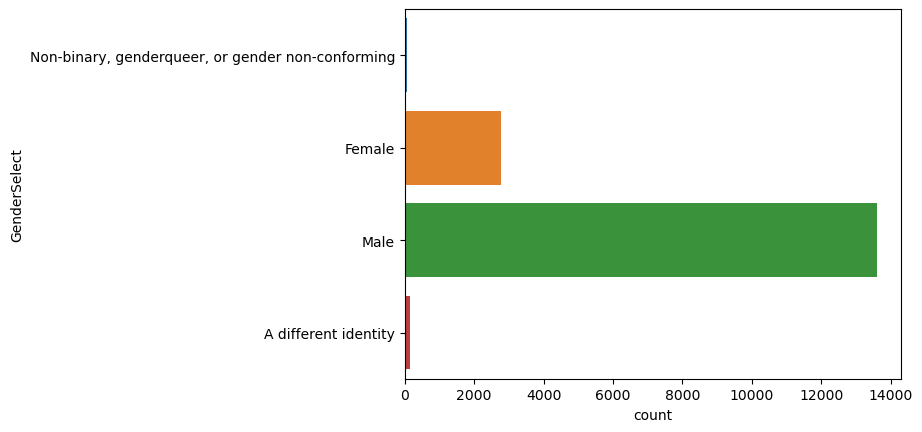

In [17]:
sns.countplot(y='GenderSelect', data=mcq)

# 여성보다는 남성의 비율이 훨씬 높음

### 국가별 응답수

In [23]:
con_df = pd.DataFrame(mcq['Country'].value_counts())

con_df['국가'] = con_df.index
con_df.columns = ['응답 수', '국가']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

# US > India > Other > Russia > UK ... 순으로 응답수가 많음

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


### 연령 정보

In [24]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

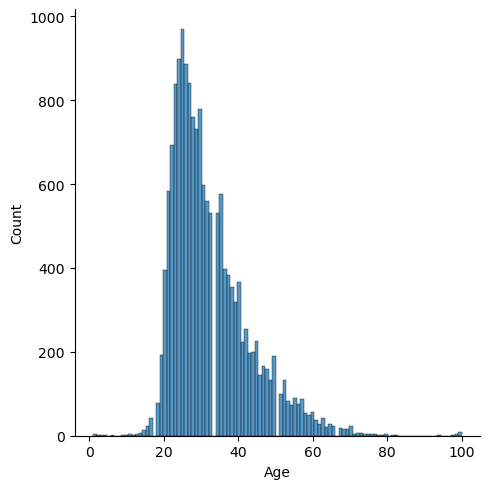

In [25]:
sns.displot(mcq[mcq['Age'] > 0]['Age'])

# 응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세.

### 학력

<AxesSubplot: xlabel='count', ylabel='FormalEducation'>

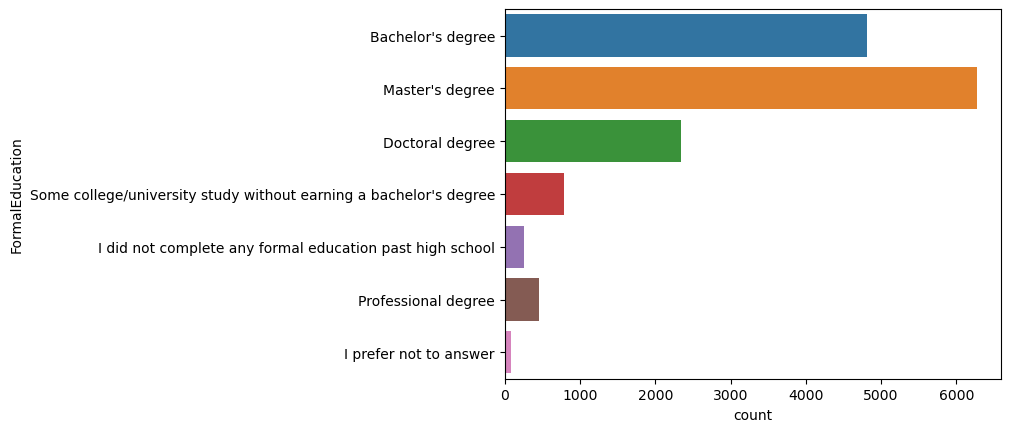

In [27]:
sns.countplot(y='FormalEducation', data=mcq)

# 석사학위 > 학사 > 박사 .. 순

### 전공

In [29]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

# 컴퓨처 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순..

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot: xlabel='count', ylabel='MajorSelect'>

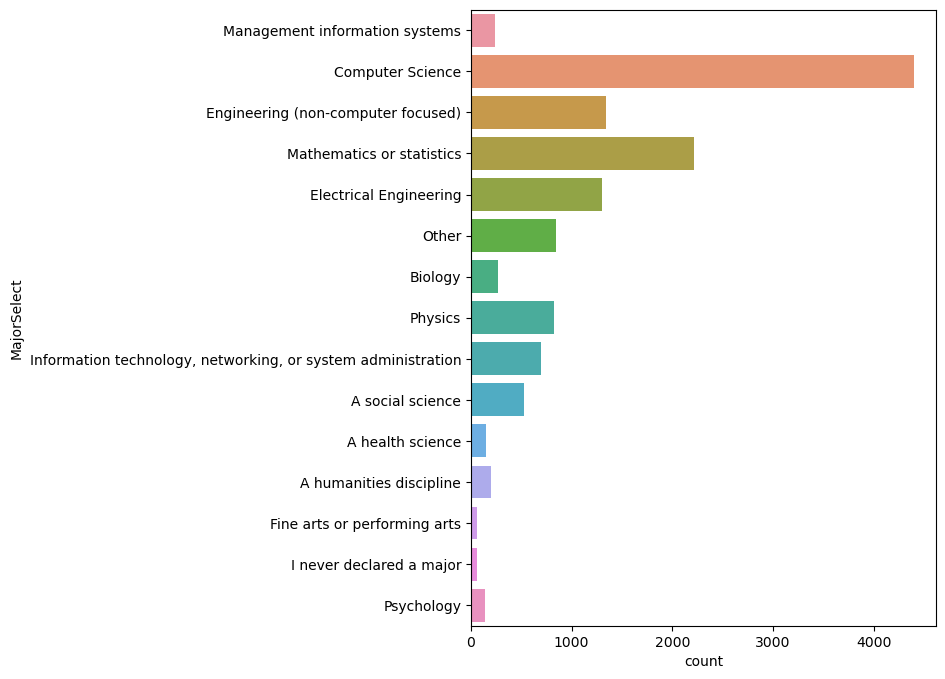

In [30]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

### 취업 여부

In [31]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot: xlabel='count', ylabel='EmploymentStatus'>

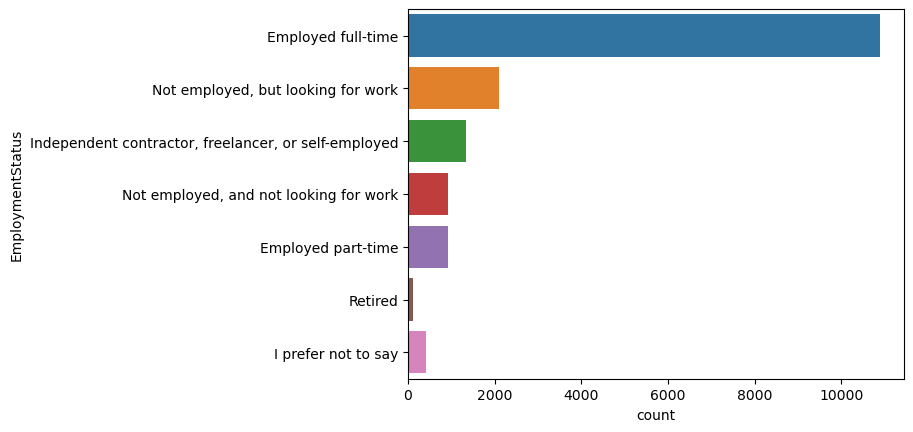

In [32]:
sns.countplot(y='EmploymentStatus', data=mcq)

### 프로그래밍 경험

`Tenure`항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문.

<AxesSubplot: xlabel='count', ylabel='Tenure'>

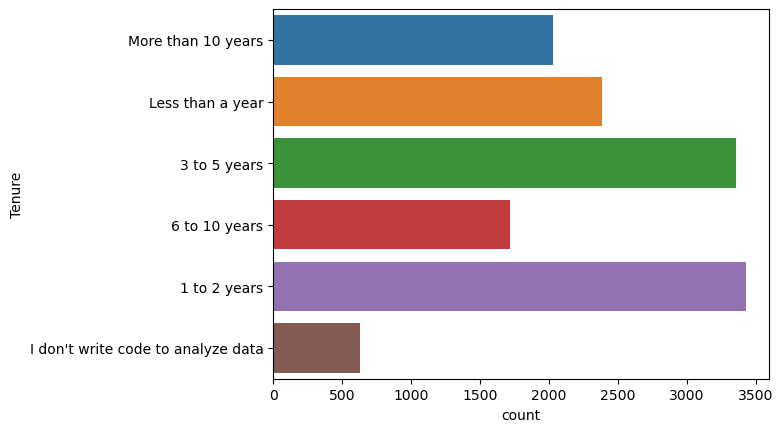

In [33]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea : 194


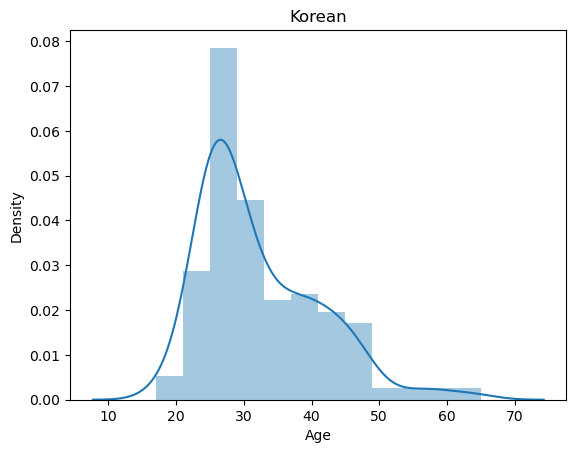

In [34]:
korea = mcq.loc[mcq['Country'] == 'South Korea']

print('The number of interviewees in Korea : ' +str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [35]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korea')

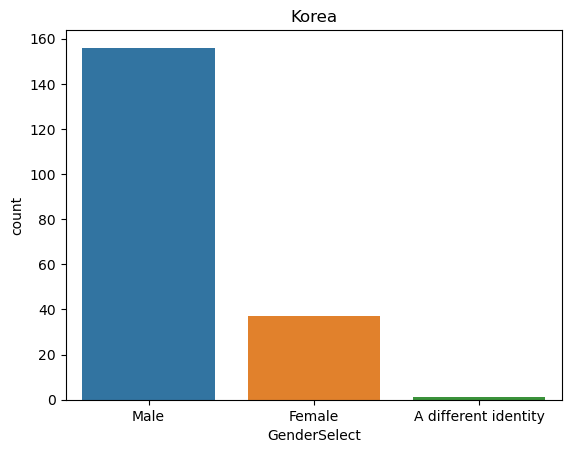

In [36]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korea')

Text(0.5, 1.0, 'korean Male')

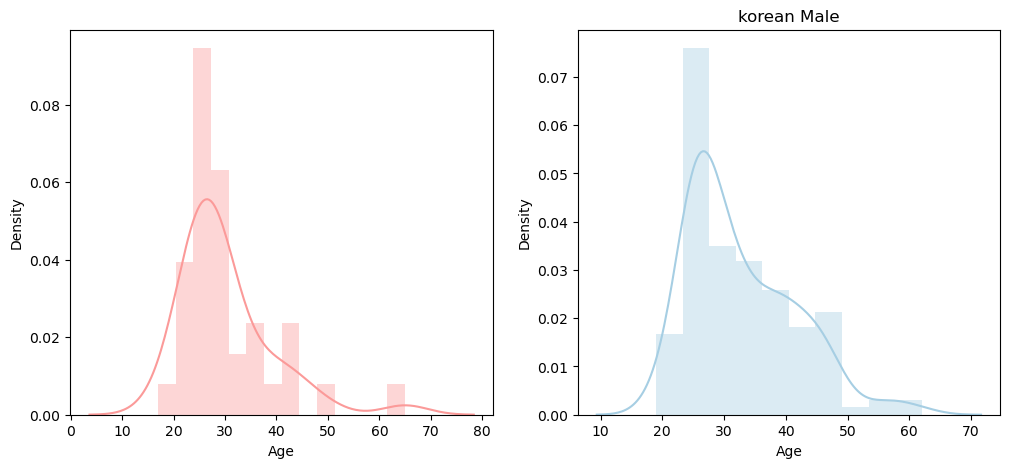

In [61]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

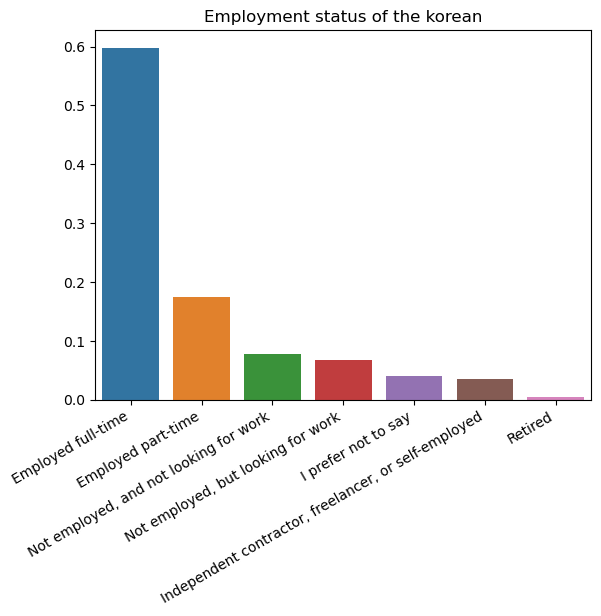

In [58]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))

plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()


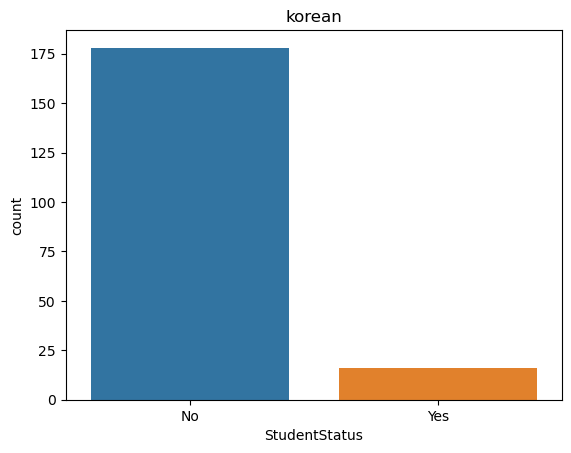

In [62]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [64]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work'
)]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)
